## Code used for Cumberpatch et al (2020)
### 'Evolution of a mixed siliciclastic-carbonate deep-marine system on an unstable margin: the Cretaceous of the Eastern Greater Caucasus, Azerbaijan'

### Load packages

In [1]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import matplotlib.patches as mpatches
from matplotlib import colors
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load data

In [2]:
os.chdir("/Users/euan-soutter/Desktop/Python/Field/azerbaijan_2020/Data") # Sets working directory
dfcntu = pd.read_csv("az_pc_cntu.csv")
dfcosa = pd.read_csv("az_pc_cosa.csv")
dfcmms = pd.read_csv("az_pc_cmms.csv")
dfUC = pd.read_csv("az_ds_UC.csv")
dfUCQ = pd.read_csv("az_ds_UCQ.csv")
dfLC = pd.read_csv("az_ds_LC.csv")

### Divide and assign data

In [3]:
StrikeUC = dfUC.Strike 
DipUC = dfUC.Dip 
StrikeUCQ = dfUCQ.Strike 
DipUCQ = dfUCQ.Dip 
StrikeLC = dfLC.Strike 
DipLC = dfLC.Dip 

### Plot stereonet

Text(0.5, 1.0, 'Cretaceous Structure of the Qonaqkend Zone')

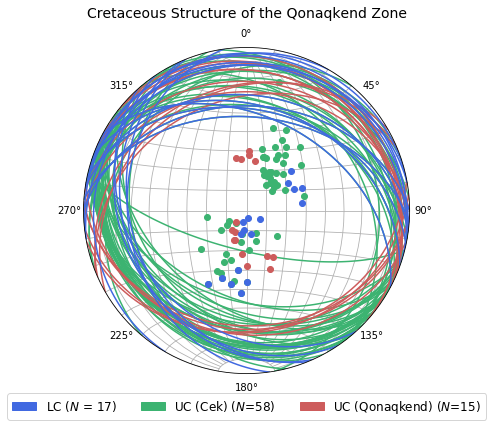

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

test = ax.plane(StrikeUC, DipUC, c='mediumseagreen')
ax.pole(StrikeUC,DipUC,c='mediumseagreen')
# ax.density_contourf(StrikeUC, DipUC, measurement='poles', cmap='binary')

ax.plane(StrikeUCQ, DipUCQ, c='indianred')
ax.pole(StrikeUCQ,DipUCQ,c='indianred')
# ax.density_contourf(StrikeUCQ, DipUCQ, measurement='poles', cmap='binary')

# foldstrike, folddip = mplstereonet.fit_girdle(StrikeUC, DipUC)
# ax.plane(foldstrike,folddip,c='k',linestyle='dashed')
# plunge, bearing = mplstereonet.pole2plunge_bearing(foldstrike,folddip)
# ax.plane(bearing,plunge,c='r')

ax.plane(StrikeLC, DipLC, c='royalblue')
ax.pole(StrikeLC,DipLC,c='royalblue')
# ax.density_contourf(StrikeLC, DipLC, measurement='poles', cmap='binary')

StrikeUClabel = mpatches.Patch(color='mediumseagreen')
StrikeUCQlabel = mpatches.Patch(color='indianred')
StrikeLClabel = mpatches.Patch(color='royalblue')
ax.legend((StrikeLClabel, StrikeUClabel, StrikeUCQlabel),('LC (${N}$ = 17)','UC (Cek) (${N}$=58)','UC (Qonaqkend) (${N}$=15)'), 
          loc='lower center', ncol=3,bbox_to_anchor=(0.5,-0.16), fontsize=12)
ax.grid()

plt.title('Cretaceous Structure of the Qonaqkend Zone', pad=30, fontsize=14)
# plt.savefig('/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Figs/az_stereo.png', dpi=400,bbox_inches='tight')

### Plot rose diagrams

(<a list of 16 Line2D ticklines objects>,
 <a list of 8 Text major ticklabel objects>)

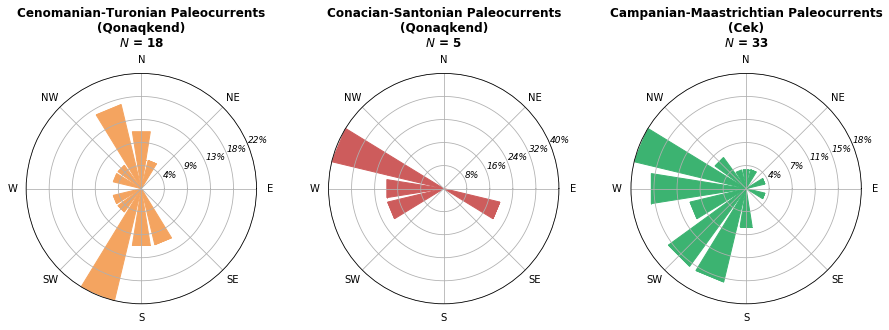

In [5]:
from windrose import WindroseAxes
from matplotlib.projections import register_projection
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

# bins = np.arange(0., 360., 22.5)
# dfcen['freq'] = dfcen.groupby(['PC', pd.cut(dfcen.PC, bins)])['PC'].transform('count')
# dftur['freq'] = dftur.groupby(['PC', pd.cut(dftur.PC, bins)])['PC'].transform('count')

fig=plt.figure()

rect=[0,0,0.8,0.8] 
wa=WindroseAxes(fig, rect)
fig.add_axes(wa)
wa.bar(dfcntu.PC, dfcntu.PC, nsector=16,normed=True, color='sandybrown',edgecolor='k')
wa.set_title('Cenomanian-Turonian Paleocurrents\n(Qonaqkend)\n${N}$ = 18',weight='bold',pad=15)
wa.set_radii_angle(angle=22.5,fontsize=9,fontstyle='italic',zorder=0)
wa.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
wa.set_thetagrids(np.arange(0.,360.,45),labels=['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

rect1=[0.7, 0, 0.8, 0.8]
wa1=WindroseAxes(fig, rect1)
fig.add_axes(wa1)
wa1.bar(dfcosa.PC,dfcosa.PC, nsector=16,normed=True,color='indianred', edgecolor='k')
wa1.set_title('Conacian-Santonian Paleocurrents\n(Qonaqkend)\n${N}$ = 5',weight='bold',pad=15)
wa1.set_radii_angle(angle=22.5,fontsize=9,fontstyle='italic',zorder=0)
wa1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
wa1.set_thetagrids(np.arange(0.,360.,45),labels=['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

rect1=[1.4, 0, 0.8, 0.8]
wa1=WindroseAxes(fig, rect1)
fig.add_axes(wa1)
wa1.bar(dfcmms.PC,dfcmms.PC, nsector=16,normed=True,color='mediumseagreen', edgecolor='k')
wa1.set_title('Campanian-Maastrichtian Paleocurrents\n(Cek)\n${N}$ = 33',weight='bold',pad=15)
wa1.set_radii_angle(angle=22.5,fontsize=9,fontstyle='italic',zorder=0)
wa1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
wa1.set_thetagrids(np.arange(0.,360.,45),labels=['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

# plt.savefig('/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Figs/az_rose.png', dpi=400,bbox_inches='tight')